<a href="https://colab.research.google.com/github/Adityapratapsingh28/Car-selling-price-prediction/blob/main/Cardekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAR SELLING PRICE PREDICTION

##Kaggle link of dataset - https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

##STEP BY STEP PROCESS FOLLOWED TO TRAIN THE MODEL
1. Download and load the dataset
2. Data Preparation and Cleaning
3. Changing the column values of dataset for model training
4. Data Visualisation
5. Splitting the dataset
6. Evaluating the model for training data(Used polynomial regression)
7. Scope for improvement

###Importing Libraries

In [324]:
!pip install opendatasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Importing dataset


In [325]:
data_filename = '/content/CAR DETAILS FROM CAR DEKHO.csv'

In [326]:
import pandas as pd
df = pd.read_csv(data_filename)

In [327]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


## Data preprocessing and cleaning

In [328]:
# checking columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [329]:
# checking rows and columns
df.shape

(4340, 8)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [331]:
df.isnull

<bound method DataFrame.isnull of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission    

In [332]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
dtype: float64

In [333]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [334]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


###Removing duplicates value

In [335]:
car_dup = df.duplicated().any()
car_dup

True

In [336]:
df = df.drop_duplicates()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [337]:
df.shape

(3577, 8)

In [338]:
car_dup = df.duplicated().any()
car_dup

False

## changing coloumns values of dataset
1. Petrol = 1 , Diesel = 0 , cng - 2 , lpg -3 , electric -4
2. manual = 1 , automatic = 0
3. individual = 0 , dealer = 1, trustmark dealer = 2
owner
4.First owner = 0 , second owner = 1 , third owner = 2 , fourth & above = 3 , test drive = 4

In [339]:
df['fuel'] = df['fuel'].map({'Petrol': 1, 'Diesel': 0 , 'CNG' : 2 , 'LPG' : 3 , 'Electric' : 4})

<ipython-input-339-9c8a148f5078>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel'] = df['fuel'].map({'Petrol': 1, 'Diesel': 0 , 'CNG' : 2 , 'LPG' : 3 , 'Electric' : 4})


In [340]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,1,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,1,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,Individual,Manual,First Owner


In [341]:
df['transmission'] = df['transmission'].map({'Manual': 1, 'Automatic': 0})

<ipython-input-341-8d0817e0c625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission'] = df['transmission'].map({'Manual': 1, 'Automatic': 0})


In [342]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,Individual,1,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,Individual,1,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,Individual,1,First Owner
3,Datsun RediGO T Option,2017,250000,46000,1,Individual,1,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,Individual,1,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,Individual,1,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,Individual,1,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,1,Individual,1,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,Individual,1,First Owner


In [343]:
df['seller_type'] = df['seller_type'].map({'Individual':0, 'Dealer': 1 , 'Trustmark Dealer' : 2})

<ipython-input-343-95842ee1ec2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_type'] = df['seller_type'].map({'Individual':0, 'Dealer': 1 , 'Trustmark Dealer' : 2})


In [344]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,1,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,1,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,1,First Owner
3,Datsun RediGO T Option,2017,250000,46000,1,0,1,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,1,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,0,1,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,0,1,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,1,0,1,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,0,1,First Owner


In [345]:
type_of_owner = df.owner.value_counts()
type_of_owner

First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

In [346]:
df['owner'] = df['owner'].map({'First Owner':0, 'Second Owner': 1 , 'Third Owner' : 2 , 'Fourth & Above Owner' : 3 , 'Test Drive Car' : 4})

<ipython-input-346-08ca02326b29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner'] = df['owner'].map({'First Owner':0, 'Second Owner': 1 , 'Third Owner' : 2 , 'Fourth & Above Owner' : 3 , 'Test Drive Car' : 4})


In [347]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,1,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,1,1
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,0,1,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,0,1,1
4337,Maruti 800 AC BSIII,2009,110000,83000,1,0,1,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,0,1,0


# Data Visualization

<Axes: xlabel='name', ylabel='selling_price'>

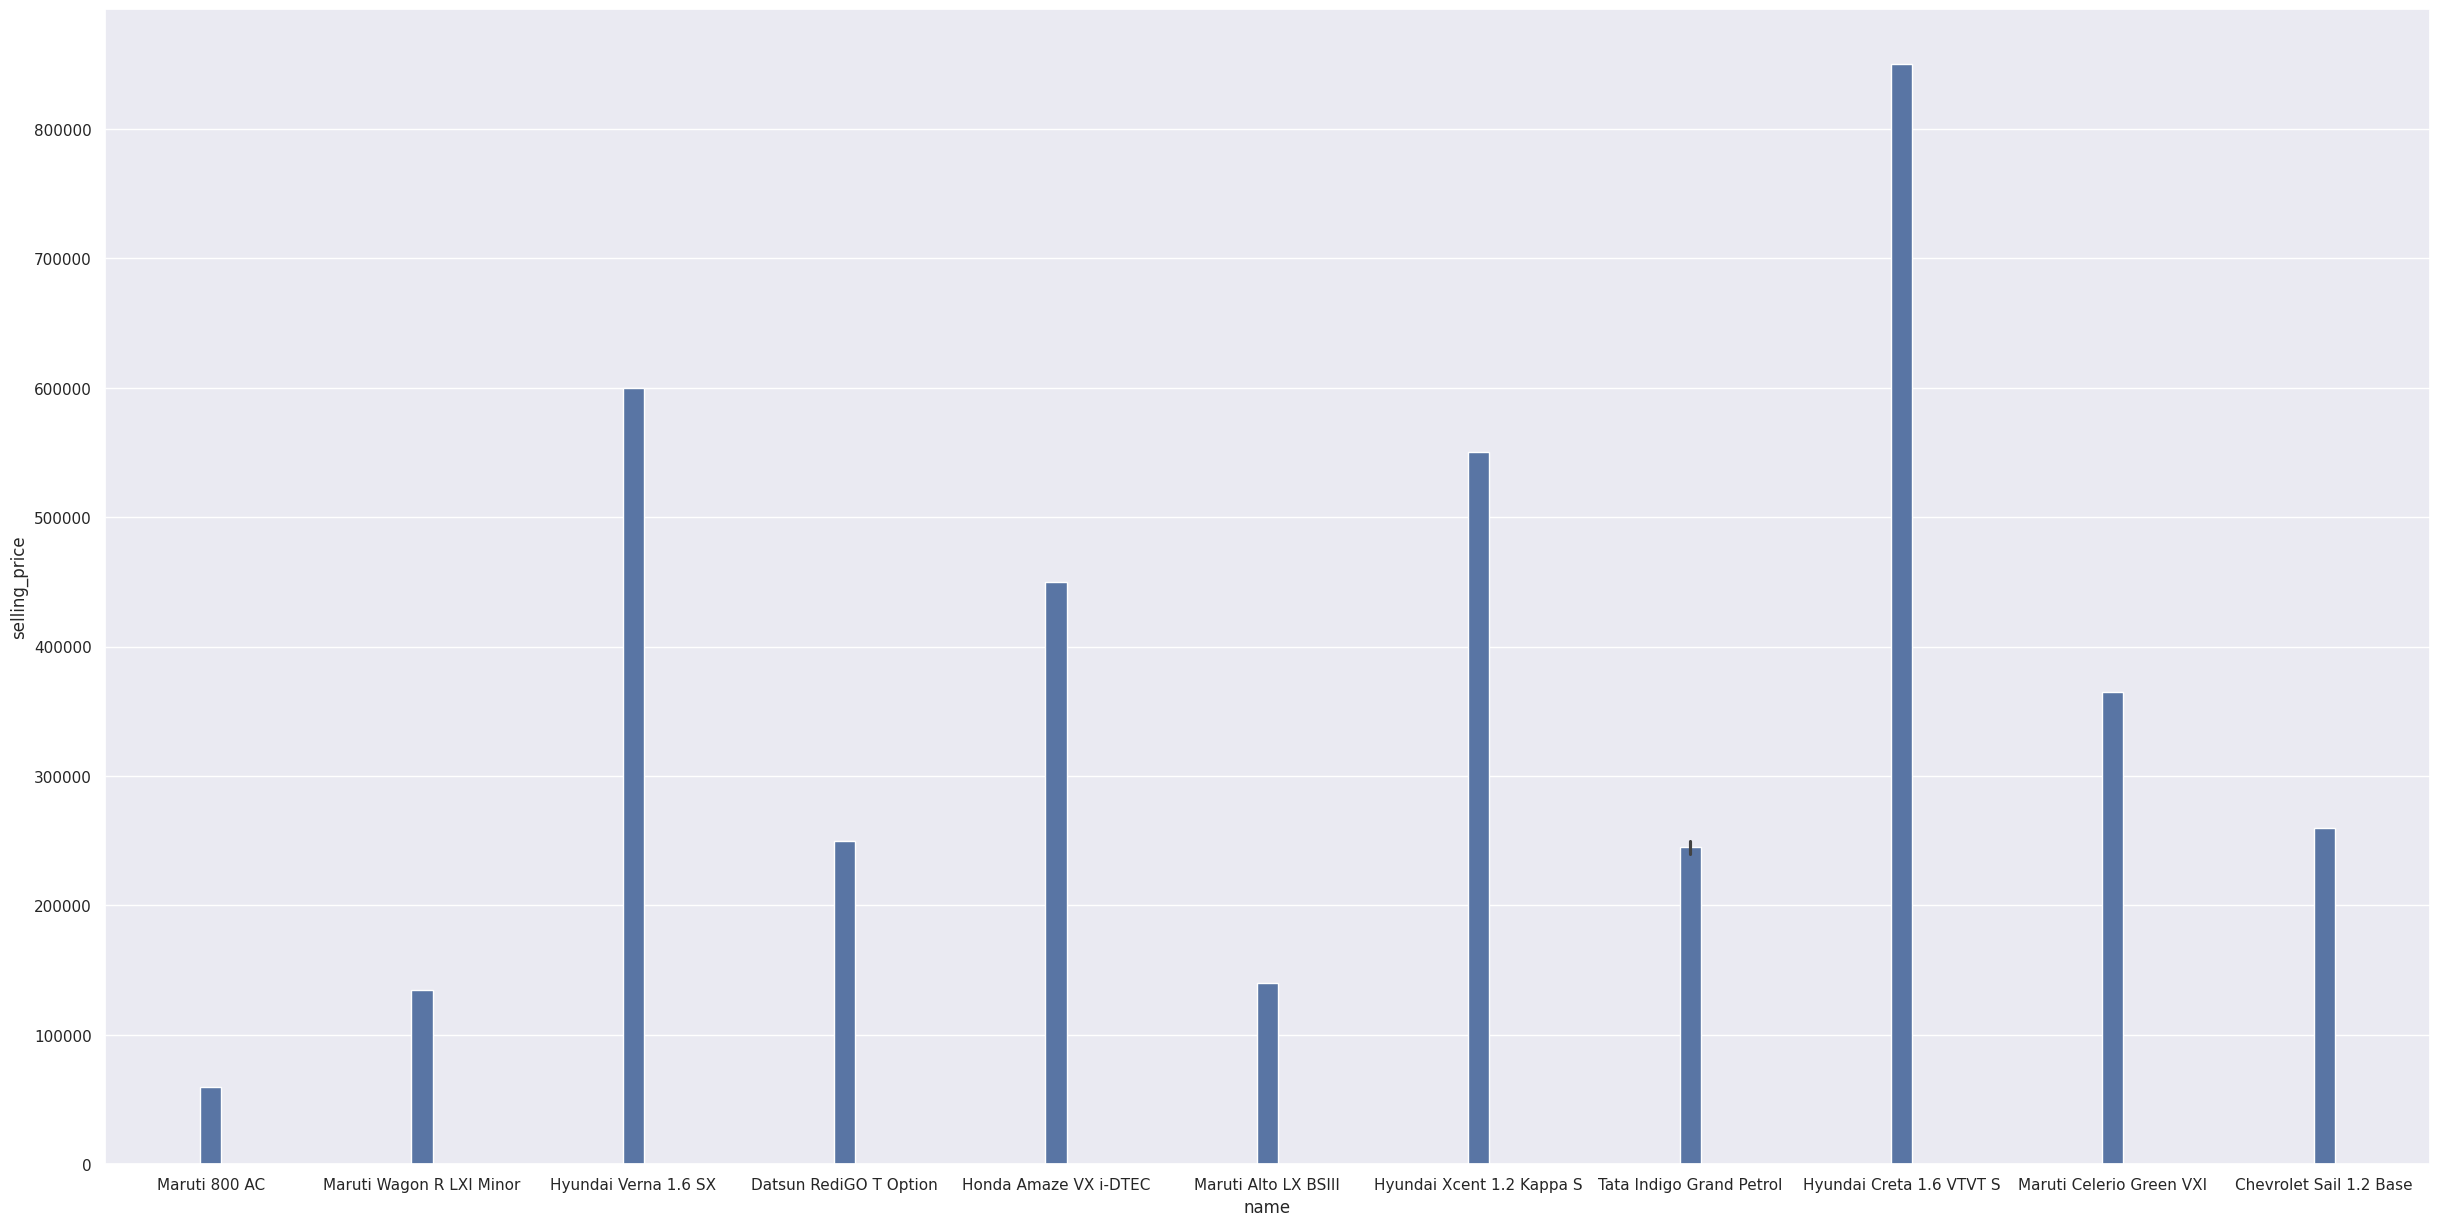

In [348]:
plt.figure(figsize=(30,15))
sns.barplot(x='name', y='selling_price',data = df[:12], width = 0.1)

<Axes: xlabel='fuel', ylabel='selling_price'>

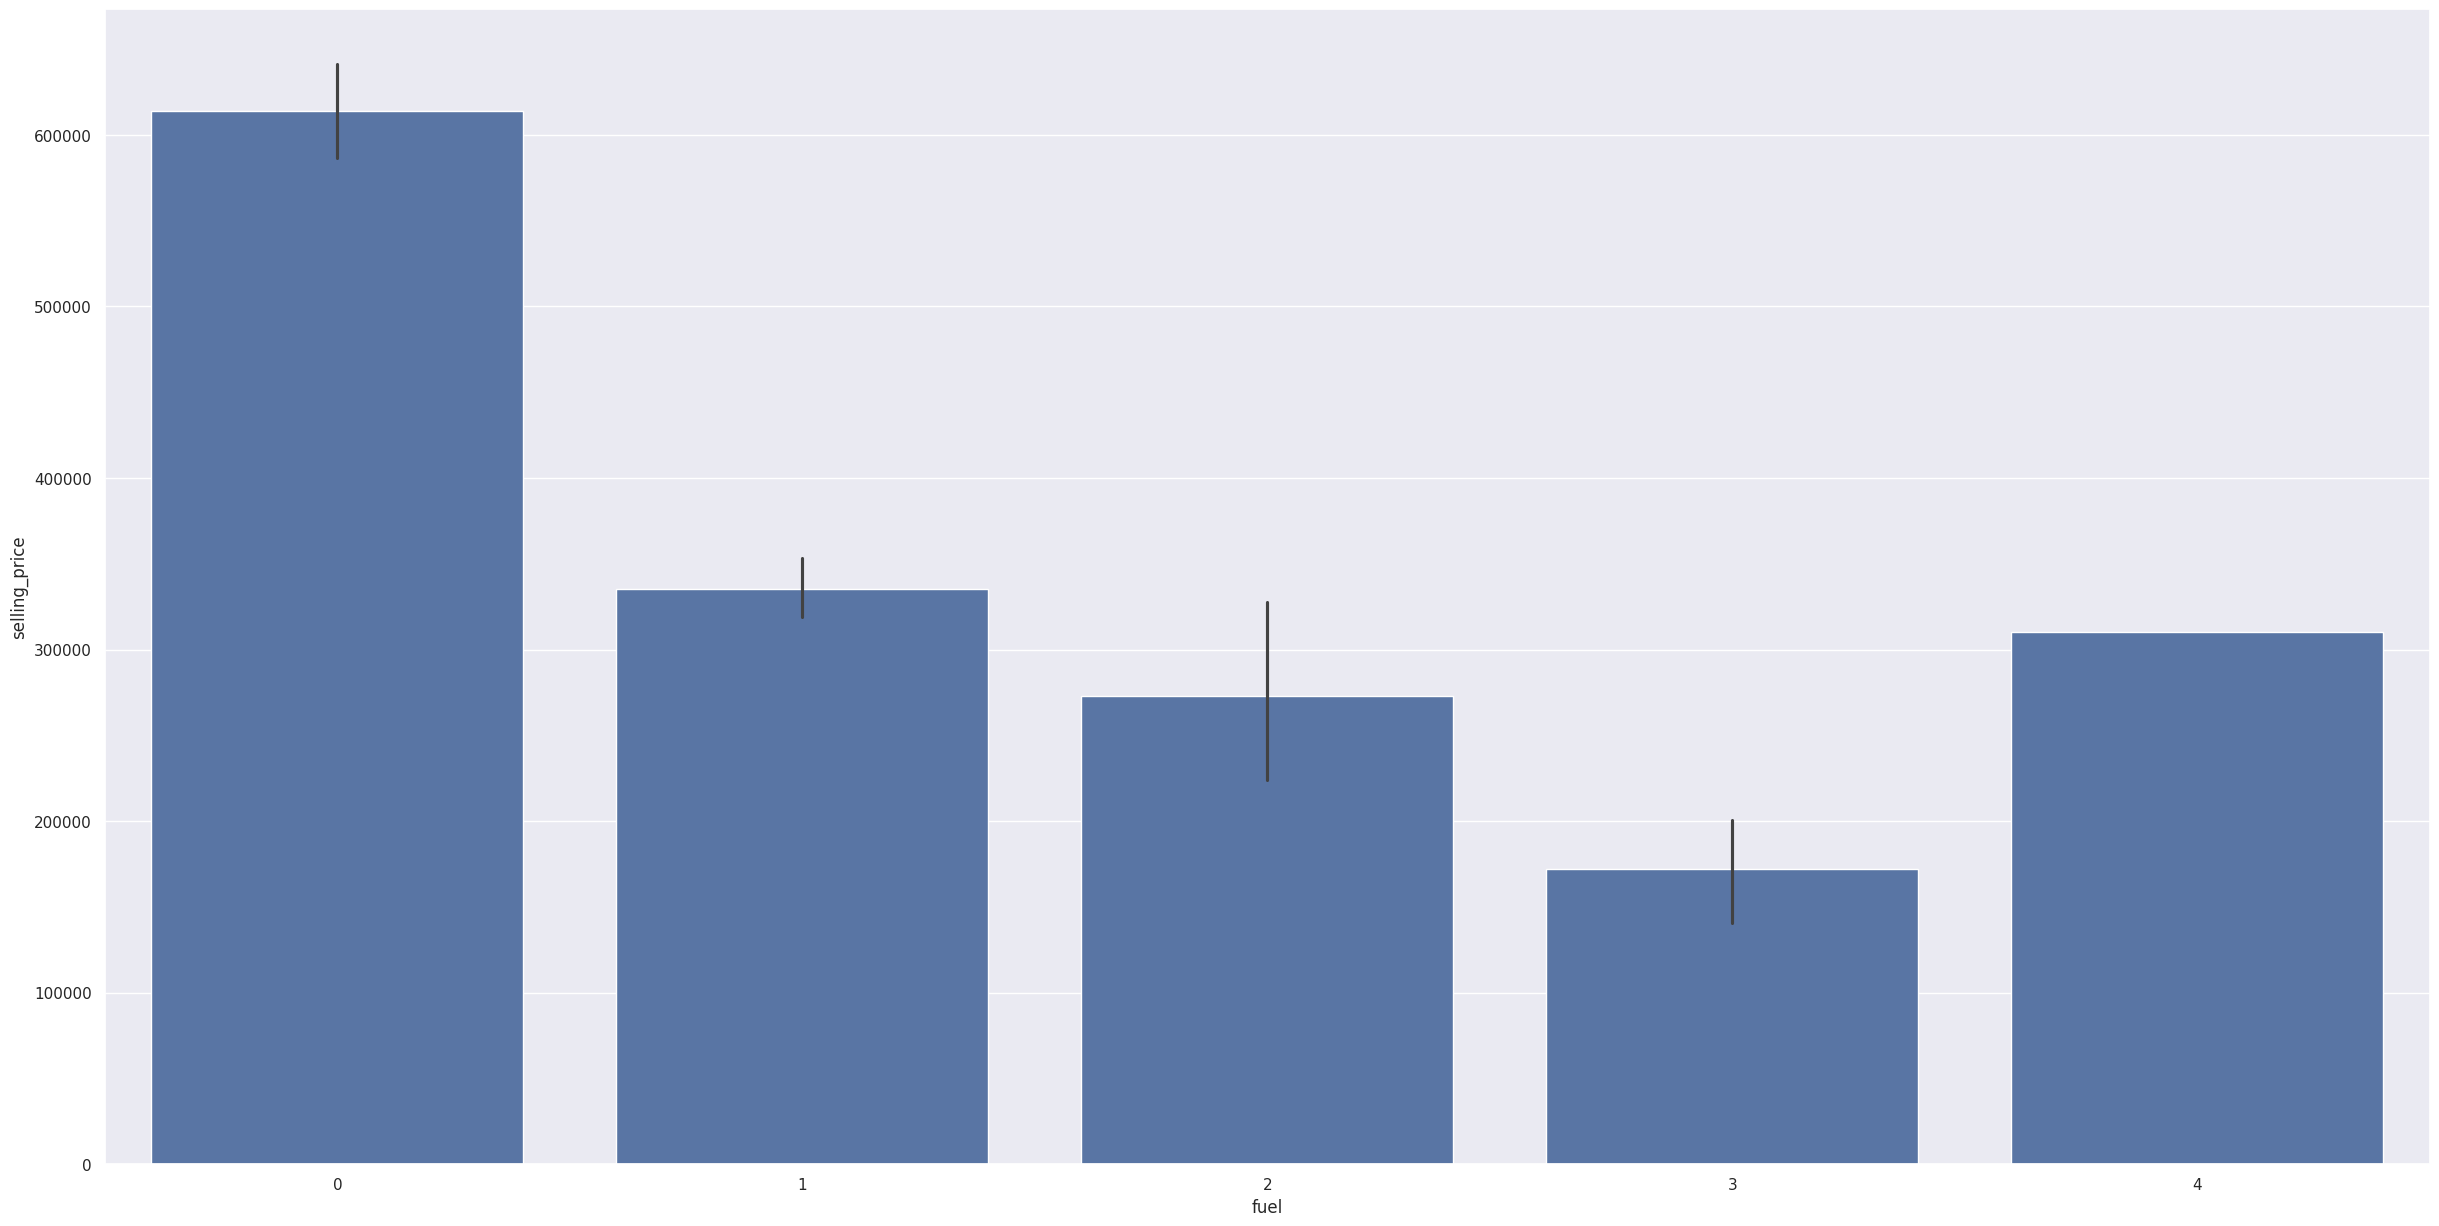

In [349]:
plt.figure(figsize=(30,15))
sns.barplot(x='fuel', y='selling_price',data = df)

<Axes: xlabel='transmission', ylabel='selling_price'>

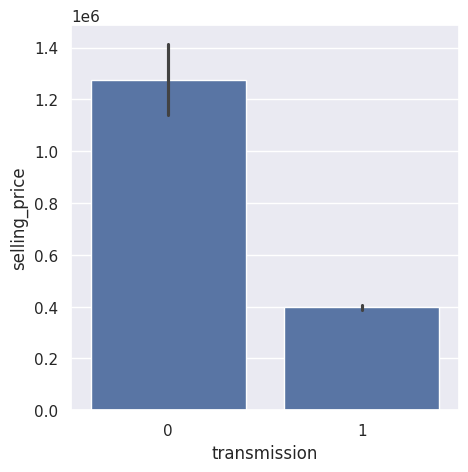

In [350]:
plt.figure(figsize=(5,5))
sns.barplot(x='transmission', y='selling_price',data = df, )

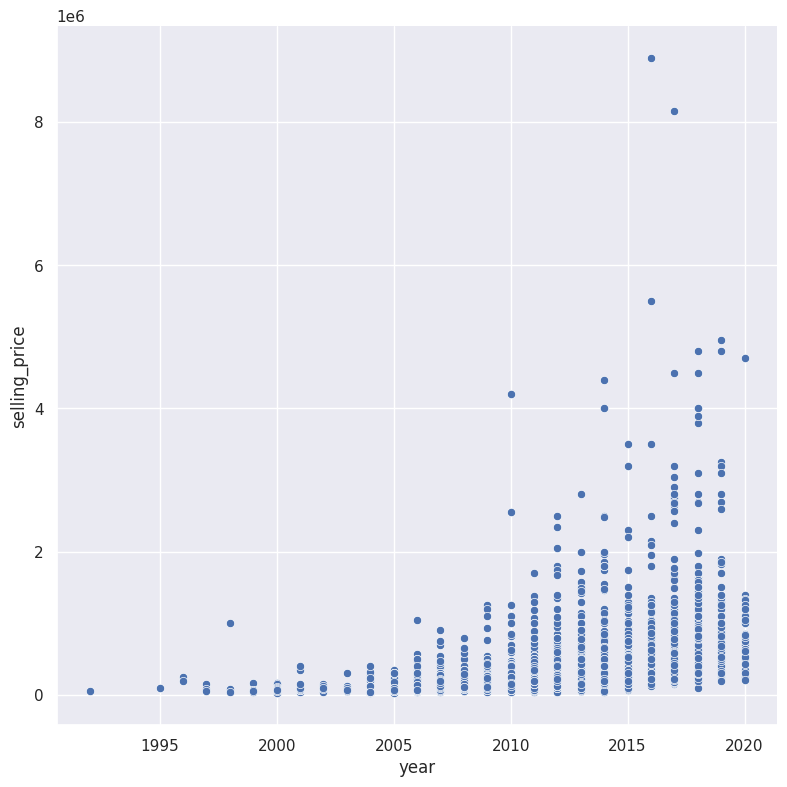

In [351]:
sns.set(style='darkgrid')
sns.pairplot(df, x_vars=['year'], y_vars='selling_price',height=8, aspect=1, kind='scatter')

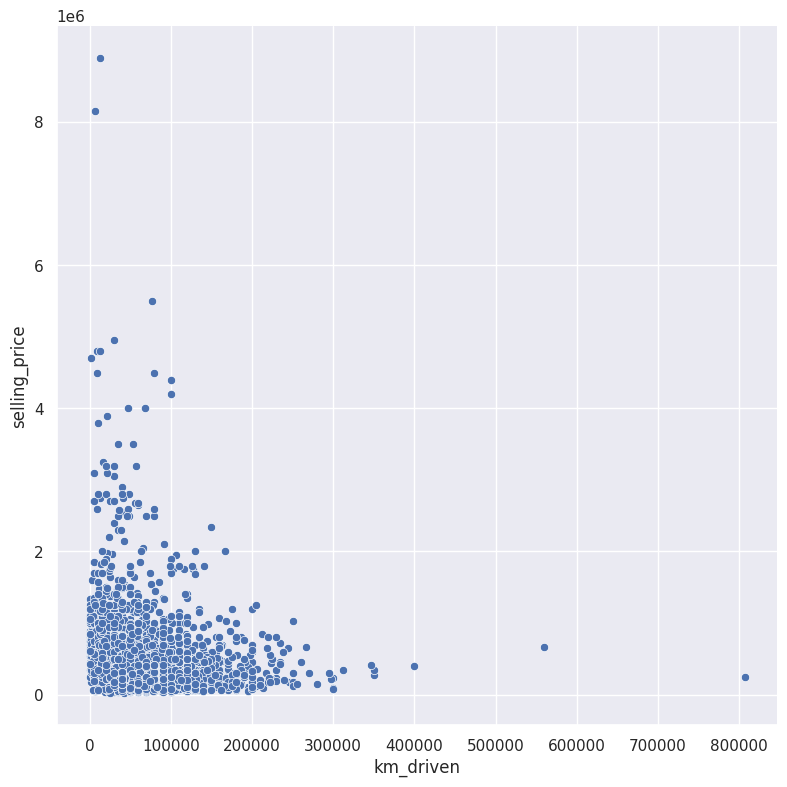

In [352]:
sns.pairplot(df, x_vars=['km_driven'], y_vars='selling_price',height=8, aspect=1, kind='scatter')

In [353]:
!pip install pandas_summary

In [354]:
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(df)
dfs.columns_stats

<ipython-input-354-ce6aa294a9db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfs = DataFrameSummary(df)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
counts,3577,3577,3577,3577,3577,3577,3577,3577
uniques,1491,27,445,770,5,3,2,5
missing,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%
types,categorical,numeric,numeric,numeric,numeric,numeric,bool,numeric


In [355]:
df.transmission.value_counts()

1    3265
0     312
Name: transmission, dtype: int64

In [356]:
df.seller_type.value_counts()

0    2832
1     712
2      33
Name: seller_type, dtype: int64

In [357]:
df['selling_price'] = df['selling_price'].apply(lambda x: np.log(x))

<ipython-input-357-a80bd585fca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selling_price'] = df['selling_price'].apply(lambda x: np.log(x))


In [358]:
df = df.drop('name',axis = 1 )

##Finding and deleting Outliers by IQR method

In [359]:
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,2012.962538,12.730341,69250.545709,0.520268,0.217501,0.912776,0.516914
std,4.251759,0.817210,47579.940016,0.557334,0.434394,0.282202,0.770910
min,1992.000000,9.903488,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,12.206073,36000.000000,0.000000,0.000000,1.000000,0.000000
50%,2013.000000,12.765688,60000.000000,0.000000,0.000000,1.000000,0.000000
75%,2016.000000,13.304685,90000.000000,1.000000,0.000000,1.000000,1.000000
max,2020.000000,16.001562,806599.000000,4.000000,2.000000,1.000000,4.000000


In [383]:
Q1 = df.km_driven.quantile(0.25)
Q3 = df.km_driven.quantile(0.75)
Q1 , Q3

(35000.0, 90000.0)

In [361]:
IQR = Q3 -Q1
IQR

54000.0

In [362]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit , upper_limit

(-45000.0, 171000.0)

In [363]:
df[(df.km_driven<lower_limit)|(df.km_driven>upper_limit)]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
32,2011,13.989464,175900,0,1,0,0
69,2010,12.542545,350000,0,0,1,1
70,2011,12.765688,230000,0,0,1,0
159,2015,12.611538,175000,0,0,1,0
197,2009,12.345830,230000,0,0,1,2
...,...,...,...,...,...,...,...
4208,2001,11.918391,256000,0,1,1,0
4231,2011,13.592367,230000,0,0,1,0
4255,2014,13.384728,218000,0,0,1,1
4286,2010,11.775290,210000,0,0,1,1


In [364]:
df = df[(df.km_driven>lower_limit)&(df.km_driven<upper_limit)]

In [365]:
df.max(axis = 0)

year               2020.000000
selling_price        16.001562
km_driven        170000.000000
fuel                  4.000000
seller_type           2.000000
transmission          1.000000
owner                 4.000000
dtype: float64

In [366]:
Q1 = df.selling_price.quantile(0.25)
Q3 = df.selling_price.quantile(0.75)

In [367]:
IQR = Q3 -Q1
IQR

1.0986122886681091

In [368]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit , upper_limit

(10.55815421252801, 14.952603367200446)

In [369]:
df[(df.selling_price<lower_limit)|(df.selling_price>upper_limit)]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,2017,15.913528,6500,0,1,0,0
101,2018,15.319588,9800,1,1,0,0
539,2014,15.297115,100000,0,0,0,1
553,2018,15.150512,10000,0,1,0,0
555,2019,15.414898,30000,0,1,0,0
731,2018,15.201805,68000,0,0,0,0
963,2020,15.363073,1500,0,0,0,0
968,2014,15.201805,47000,0,0,0,0
988,2018,15.201805,68000,1,0,0,0
1088,2016,15.068274,53000,0,1,0,0


In [370]:
df = df[(df.selling_price>lower_limit)&(df.selling_price<upper_limit)]

##Splitting data into training and testing

In [371]:
x = df.drop(['selling_price'], axis = 1)
y = df['selling_price']

In [372]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 0)

In [373]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [374]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

###Polynomial Regression

In [375]:
degree = 2
lin_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
lin_reg.fit(x_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [379]:
#Predicton of training data
pred_train = lin_reg.predict(x_train_scaled)

In [380]:
# R^2 Error
error_score = metrics.r2_score(y_train, pred_train)
print("R squared Error :", error_score)

R squared Error : 0.701325482854957


In [402]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_train, pred_train)))
print('MSE: {}'.format(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_train, pred_train))))

MAE: 0.33907416089953474
MSE: 0.19067289263134793
RMSE: 0.4366610729517207


Text(0, 0.5, 'actual price')

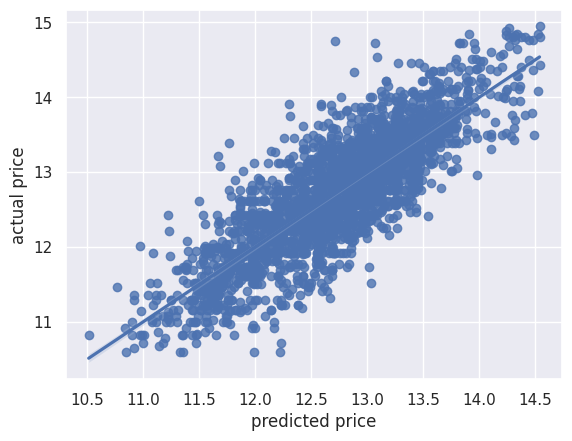

In [381]:
sns.regplot(x=pred_train,y=y_train)
plt.xlabel("predicted price")
plt.ylabel("actual price")

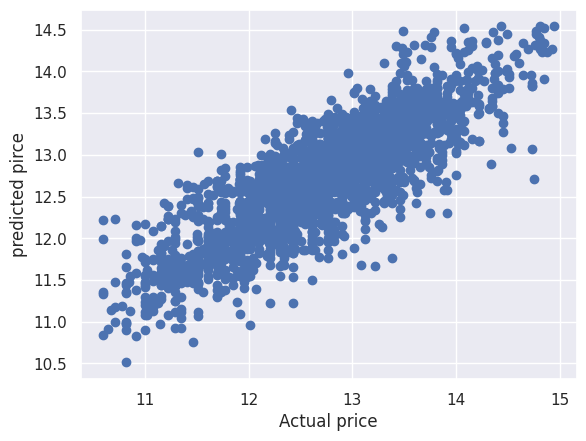

In [386]:
plt.scatter(y_train , pred_train)
plt.xlabel("Actual price")
plt.ylabel("predicted pirce")
plt.show()

#SCOPE FOR IMPROVEMENT
We tried our best to clean the data but the dataset is too variable. That is why the R sqaured error came out to be around 0.70. We will look into it and work for further improvement.